##  Here, I explore SVD and PCA with some code examples

In [1]:
# Imports
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Parameters for 2D gaussian 
mean = [3, 3]
cov = [[4, 1], [1, 0.5]]

In [3]:
x, y = np.random.multivariate_normal(mean, cov, 10000).T

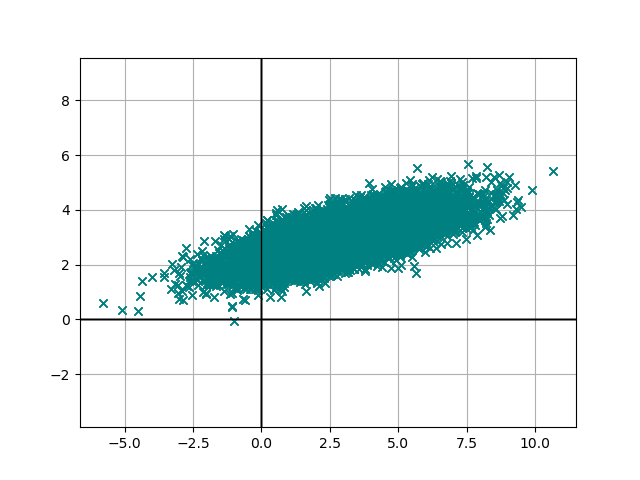

In [6]:
plt.plot(x, y, 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()
plt.show()

In [26]:
## Try to retrieve the covariance matrix with the data points
# Construct design matrix
X = np.stack([x, y])      # 2 x 10,000 matrix - 10,000 entries, x and y are rows

# Get the mean rows:
mean_row = np.mean(X, axis=1)                   # should be approx. (3, 3)
X_mean = np.tile(mean_row, (X.shape[1], 1)).T   # repeat mean row 10,000 times in axis 1 and transpose
X_centered = X - X_mean                         # center the (x,y) coordinates of X
print(X_centered, X_centered.shape)

[[ 0.17281792 -0.23065911 -0.60612357 ...  0.89896082 -0.86525256
   1.11614631]
 [-1.32697674 -0.14939873 -0.8189702  ...  0.11999021 -1.11505303
   0.25799781]] (2, 10000)


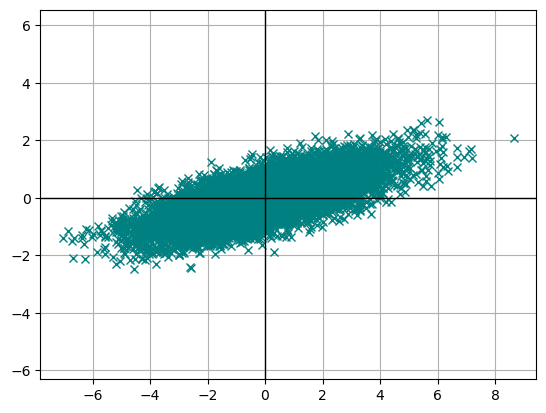

In [27]:
# Plot centered distribution
plt.plot(X_centered[0,:], X_centered[1,:], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

In [28]:
# Calculate covariance/correlation matrix of centered design matirx
C = X_centered/np.sqrt(10000) @ X_centered.T/np.sqrt(10000)
print(C)

[[4.04620367 1.01246074]
 [1.01246074 0.50686077]]


In [29]:
# Perform SVD on matrix X_centered
U, S, V_T = np.linalg.svd(X_centered/np.sqrt(X_centered.shape[1]), full_matrices=False)

In [30]:
# Calculate the principal components
T = U @ np.diag(S)
print(T.shape)
print(S)
print(T)

(2, 2)
[2.07734417 0.48755066]
[[-2.00761384 -0.12526102]
 [-0.53370914  0.47118502]]


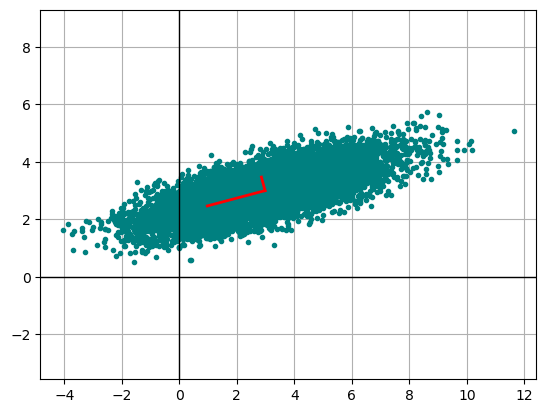

In [31]:
# Plot original data with principal components
plt.plot(X[0,:], X[1,:], '.', color='teal')
plt.plot([mean_row[0], mean_row[0]+T[0, 0]],
         [mean_row[1], mean_row[1]+T[1, 0]], '-', color='r', linewidth=2)
plt.plot([mean_row[0], mean_row[0]+T[0, 1]],
         [mean_row[1], mean_row[1]+T[1, 1]], '-', color='r', linewidth=2)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

### Generate the 2D gaussian only with random gaussian (x,y) points and a rotation matirx

(2500, 3)


(-5.611436549472524,
 5.117268471072718,
 -5.558250131907499,
 5.170454888637742,
 -3.939784855721393,
 4.106743909687538)

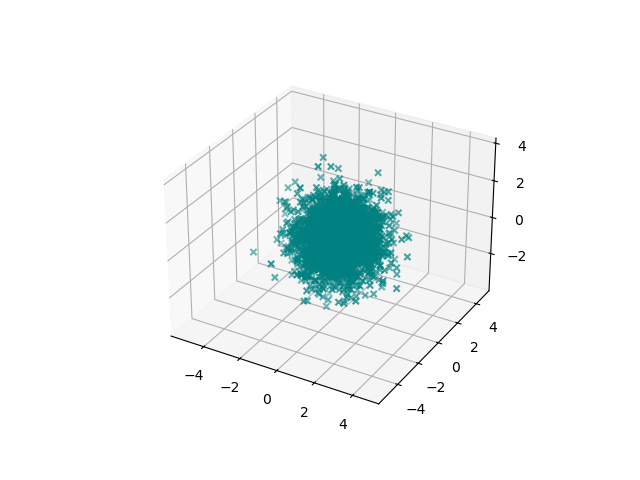

In [80]:
# Generate n points
n = 2500
points = np.random.randn(n, 3)
print(points.shape)

# Plot
# Plot 3D unit gaussian
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:, 2], marker='x', color='teal')
# ax.axvline(0, color='black', linewidth=1)
# ax.axhline(0, color='black', linewidth=1)
ax.axis('equal')
# plt.grid()

In [81]:
def get_rotation_matrix(theta):
    """Generates a rotation matrix with angle theta.

    Args:
        theta (float): Rotation angle.

    Returns:
        np.ndarray: Rotation matrix that rotates a vector with angle theta.
    """
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

def get_rotation_matrix_3D_X(theta):
    """Generates a rotation matrix with angle theta around axis X.

    Args:
        theta (float): Rotation angle.

    Returns:
        np.ndarray: Rotation matrix that rotates a vector with angle theta.
    """
    return np.array([
        [1., 0., 0.],
        [0., np.cos(theta), -np.sin(theta)],
        [0., np.sin(theta), np.cos(theta)]
    ])

(-10.399992207647875,
 12.917487972448457,
 -6.74854981251314,
 16.568930367583192,
 1.3188056356226276,
 18.806915770694875)

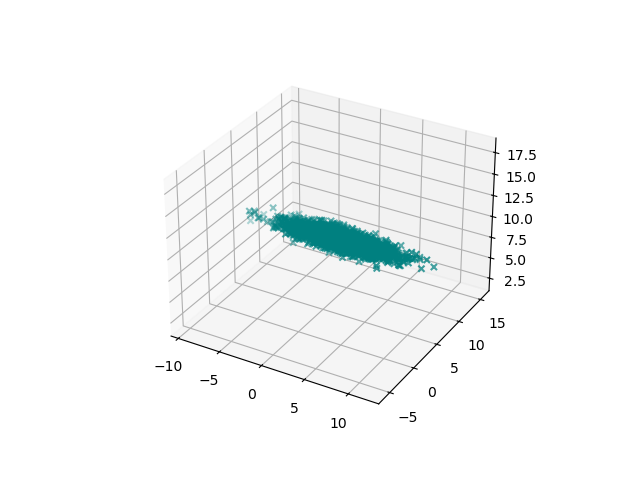

In [82]:
# Def the center and variance of the distribution
sigma = np.array([3., 0.5, 1.5])     # variance in x, y and z direction
center = np.array([[2, 5, 10]])       # center of distr.    
theta = np.pi/3.                # rotation angle
R = get_rotation_matrix(theta)
R_3D_X = get_rotation_matrix_3D_X(theta)

## Transform the uniform normally distributed point cloud
# Introduce x,y variance, offset and rotation
# X = points @ np.diag(sigma) @ R.T + np.ones((n,1)) @ center
X = points @ np.diag(sigma) @ R_3D_X.T + np.ones((n,1)) @ center

# Plot
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:, 2], marker='x', color='teal')

# plt.plot(X[:,0], X[:,1], 'x', color='teal')
# plt.axvline(0, color='black', linewidth=1)
# plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
# plt.grid()

In [83]:
# Get the mean rows
mean_row = np.mean(X, axis=0)
X_mean = np.tile(mean_row, (X.shape[0], 1))         # repeat mean row 10,000 times in axis 1
X_centered = (X - X_mean).T                         # center the (x,y) coordinates of X # NOTE: Transpose is important for SVD convention!
print(mean_row)
print(X_centered.shape)
assert X.T.shape == X_centered.shape, "Design matrix and centered matrix do not have the same dimension!"

[1.95303443 5.03435745 9.96822198]
(3, 2500)


"\nplt.plot(X_centered[0,:], X_centered[1,:], 'x', color='teal')\nplt.axvline(0, color='black', linewidth=1)\nplt.axhline(0, color='black', linewidth=1)\nplt.axis('equal')\nplt.grid()"

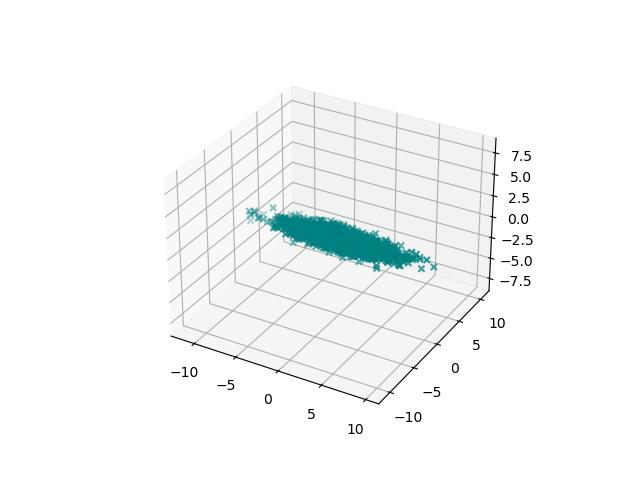

In [86]:
# Plot centered distr.
fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(X_centered[0,:], X_centered[1,:], X_centered[2, :], marker='x', color='teal')

plt.axis('equal')

"""
plt.plot(X_centered[0,:], X_centered[1,:], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()"""

In [87]:
# SVD on the centered and standardized design matrix
U, S, V_T = np.linalg.svd(X_centered/np.sqrt(n), full_matrices=False)

print(f"Shape U: {U.shape}")
print(f"Shape S: {S.shape}")
print(f"Shape V_T: {V_T.shape}")

# Calculate principal components
T = U @ np.diag(S)
print(f"Shape T: {T.shape}")

Shape U: (3, 3)
Shape S: (3,)
Shape V_T: (3, 2500)
Shape T: (3, 3)


In [88]:
# Explore the result
print(U, U.shape)
print(np.diag(S), np.diag(S).shape)
print(V_T, V_T.shape)
print(T, T.shape)

[[-9.99949622e-01 -9.09009363e-03  4.25711805e-03]
 [ 9.99727945e-03 -8.63962680e-01  5.03456594e-01]
 [-8.98476455e-04  5.03473791e-01  8.64010032e-01]] (3, 3)
[[3.01412547 0.         0.        ]
 [0.         1.5416466  0.        ]
 [0.         0.         0.50067093]] (3, 3)
[[ 0.01677897  0.00490625 -0.02141137 ...  0.02383774 -0.00093673
   0.00773933]
 [-0.0239367  -0.00687877 -0.01157341 ... -0.00050291 -0.00744928
   0.0090197 ]
 [-0.00502425  0.03685909 -0.01230867 ... -0.01122111 -0.01027548
  -0.0221088 ]] (3, 2500)
[[-3.01397362e+00 -1.40137119e-02  2.13141524e-03]
 [ 3.01330546e-02 -1.33192513e+00  2.52066079e-01]
 [-2.70812077e-03  7.76178656e-01  4.32584702e-01]] (3, 3)


In [63]:
# Get 1, 2, 3 std
theta = 2 * np.pi * np.arange(0, 1, 0.01)

X_std = T @ np.array([np.cos(theta), np.sin(theta)])
print(X_std.shape)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

(-10.399992207647875,
 12.917487972448457,
 -6.74854981251314,
 16.568930367583192,
 1.3188056356226276,
 18.806915770694875)

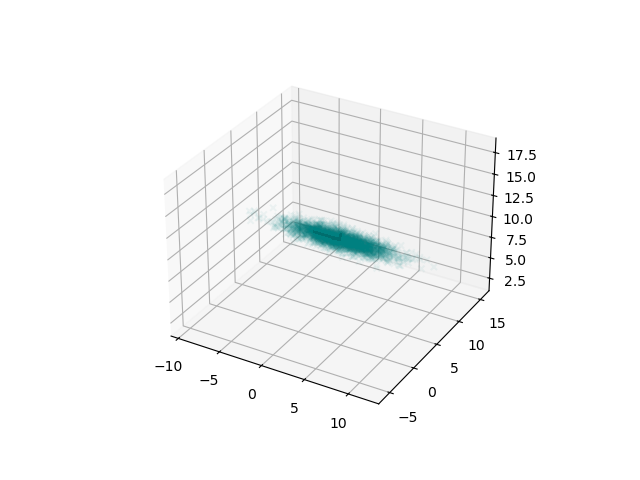

In [92]:
# Plot principal components
fig4 = plt.figure()
ax = fig4.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='x', color='teal', alpha=0.05)

ax.plot([mean_row[0], mean_row[0]+T[0, 0]],
        [mean_row[1], mean_row[1]+T[1, 0]],
        [mean_row[2], mean_row[2]+T[2, 0]], '-', color='darkred', linewidth=2)
ax.plot([mean_row[0], mean_row[0]+T[0, 1]],
        [mean_row[1], mean_row[1]+T[1, 1]],
        [mean_row[2], mean_row[2]+T[2, 1]], '-', color='darkred', linewidth=2)
ax.plot([mean_row[0], mean_row[0]+T[0, 2]],
        [mean_row[1], mean_row[1]+T[1, 2]],
        [mean_row[2], mean_row[2]+T[2, 2]], '-', color='darkred', linewidth=2)

plt.axis('equal')


(-1.768417812122275, 6.55049627505915, -5.715936527533849, 7.934664190969881)

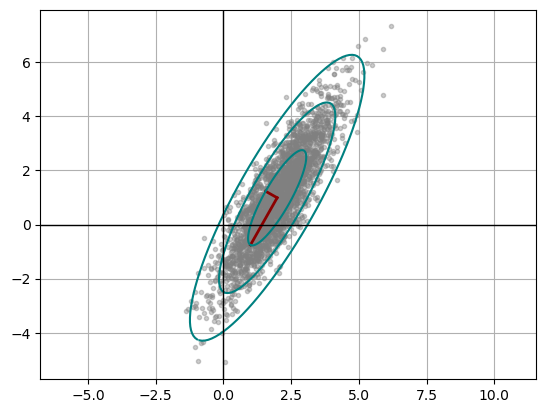

In [380]:
# Plot
# Plot centered distr.
plt.plot(X[:,0], X[:,1], '.', color='grey', alpha=0.4)

plt.plot([mean_row[0], mean_row[0]+T[0, 0]],
         [mean_row[1], mean_row[1]+T[1, 0]], '-', color='darkred', linewidth=2)
plt.plot([mean_row[0], mean_row[0]+T[0, 1]],
         [mean_row[1], mean_row[1]+T[1, 1]], '-', color='darkred', linewidth=2)
plt.plot(mean_row[0] + X_std[0,:], mean_row[1] + X_std[1,:], '-', color='teal')
plt.plot(mean_row[0] + 2*X_std[0,:], mean_row[1] + 2*X_std[1,:], '-', color='teal')
plt.plot(mean_row[0] + 3*X_std[0,:], mean_row[1] + 3*X_std[1,:], '-', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.grid()
plt.axis('equal')

(2, 200)


(-1.2298019514639553,
 1.2298019514639553,
 -1.2298019514639553,
 1.2298019514639553)

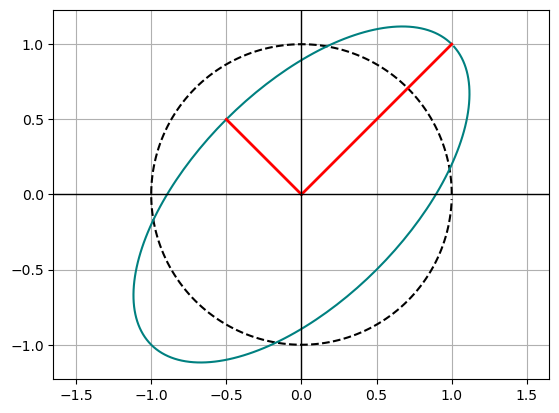

In [373]:
# Test some deformations
theta = 2 * np.pi * np.arange(0, 1, 0.005)
unit_circle = np.array([
    np.cos(theta),
    np.sin(theta)
])

# Def deformation matrix
A = np.array([
    [1, -0.5],
    [1, 0.5]
])

X_std = A @ unit_circle
print(X_std.shape)


# Plot centered distr.
plt.plot(unit_circle[0,:], unit_circle[1,:], '--', color='k')
plt.plot(X_std[0,:], X_std[1,:], '-', color='teal')
plt.plot([0, A[0, 0]],
         [0, A[1, 0]], '-', color='red', linewidth=2)
plt.plot([0, A[0, 1]],
         [0, A[1, 1]], '-', color='red', linewidth=2)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.grid()
plt.axis('equal')

## Try SVD and PCA on toy example

In [23]:
# Read data
# data = pd.read_csv("../data/wdbc.data", header=None)
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
target = breast_cancer.target
print(X.shape)      # 569 x 30 matrix - 569 samples and 30 features
print(target.shape)      # 569 x 1 array - each entry specifies if sample has cancer or not

(569, 30)
(569,)


In [24]:
# Normalize the data
mean_row = np.mean(X, axis=0)
X_mean = np.tile(mean_row, (X.shape[0], 1))     # repeat mean row 569 times in axis 1
X_centered = X - X_mean                         # center the (x,y) coordinates of X
assert X_centered.shape == X.shape

In [25]:
# Apply SVD
U, S, V_T = np.linalg.svd(X_centered, full_matrices=False)
print(f"Shape U: {U.shape}")
print(f"Shape S: {S.shape}")
print(f"Shape V_T: {V_T.shape}")

Shape U: (569, 30)
Shape S: (30,)
Shape V_T: (30, 30)


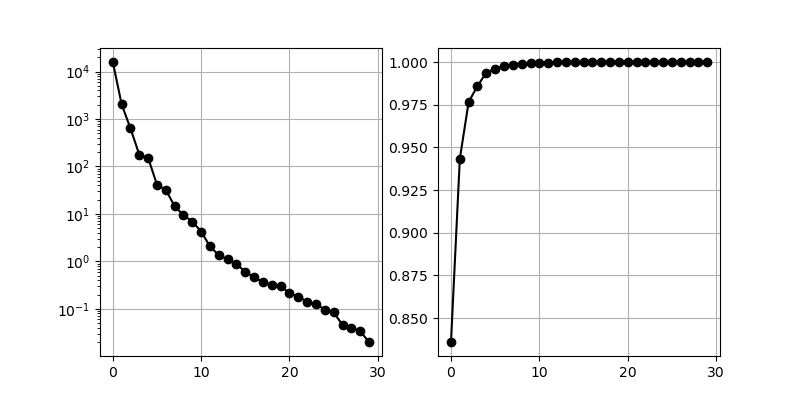

In [26]:
# Plot the 'energy' of the singular values
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.semilogy(S, '-o', color='k')
ax1.grid()
ax2 = fig.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S), '-o', color='k')
ax2.grid()

In [27]:
# Calculate the principal components
T = U @ np.diag(S)
print(f"Shape T: {T.shape}")

Shape T: (569, 30)


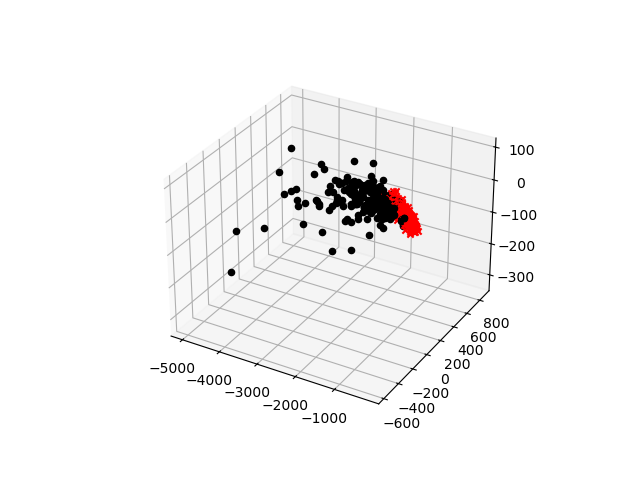

In [28]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

# Plot the data along principal compontents
for i in range(X.shape[0]):
    x = V_T[0, :] @ X[i, :].T
    y = V_T[1, :] @ X[i, :].T
    z = V_T[2, :] @ X[i, :].T

    if target[i] == 0:
        ax.scatter(x, y, z, marker='o', color='k')
    else:
        ax.scatter(x, y, z, marker='x', color='r')
plt.show()